<a href="https://colab.research.google.com/github/budennovsk/AuthorBooksComments/blob/master/GAM_sku_v10_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:
import pandas as pd
df_org = pd.read_excel('/content/Приволжский федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

pd.options.display.float_format = '{:.10f}'.format

In [3]:
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1180.7812698413,31.5000000000,0.4553333333,0.0000800978
1,2,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1258.6229314421,25.3800000000,0.2653664303,0.0000698244
2,3,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1342.6359649123,13.6800000000,0.1445906433,0.0000422256
3,4,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1267.7443502820,21.2400000000,0.4506120527,0.0000664491
4,5,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1236.0555555586,3.2400000000,0.5783950617,0.0000101936
...,...,...,...,...,...,...,...,...,...,...
2716,10,2023,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,790.6225308054,15725.3500000000,0.5749440976,0.0320313920
2717,11,2022,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,835.3173476147,10102.6800000002,0.7960359095,0.0215059321
2718,11,2023,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,707.5568156232,47919.1399999998,0.8074893569,0.0986656467
2719,12,2022,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,816.2767942531,15439.2099999997,0.8405587202,0.0309723113


In [4]:
df_org_train = df_org[(df_org['Year'] == 2023) & (df_org['Month'].isin([10, 11, 12]))].copy()
df_org_test = df_org[(df_org['Year'] == 2024) & (df_org['Month'].isin([1,2, 3]))].copy()

analit_train= df_org_train['Analytic1'].unique().tolist()
articul_train= df_org_train['Articul8'].unique().tolist()
brand_train= df_org_train['Brand'].unique().tolist()
filtered_df_test = df_org_test[
    (df_org_test['Analytic1'].isin(analit_train)) &
    (df_org_test['Articul8'].isin(articul_train)) &
    (df_org_test['Brand'].isin(brand_train))
]
filtered_df_test.reset_index(drop=True, inplace=True)
filtered_df_test['Sku_name'].unique().shape
# filtered_df_test = filtered_df_test[~filtered_df_test['Sku_name'].isin(['Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%',
#                                                                         'Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%'])]
filtered_df_test['Sku_name'].unique().shape


(84,)

In [5]:
filtered_df_test['Sku_name'].shape

(245,)

In [6]:
df_org_train['Sku_name'].unique().shape

(93,)

In [7]:
df_org_train.to_excel('train_1.xlsx')
filtered_df_test.to_excel('test_1.xlsx')

In [8]:
missing_skus = filtered_df_test[~filtered_df_test['Sku_name'].isin(df_org_train['Sku_name'])]
missing_skus['Sku_name'].unique().shape

(3,)

In [48]:
missing_skus['Sku_name'].unique()

array(['Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%',
       'Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%',
       'Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%'],
      dtype=object)

In [9]:
df_org_train['er']=df_org_train['SALES_VOL']/df_org_train['SALES_VOL'].sum()
df_train =df_org_train.reset_index(drop=True)

filtered_df_test['er']=filtered_df_test['SALES_VOL']/filtered_df_test['SALES_VOL'].sum()
df_test=filtered_df_test.reset_index(drop=True)



In [10]:
train_sum = df_train.groupby('Sku_name')['er'].sum()
train_sum.sum()

1.0000000000000002

In [11]:
test_sum = df_test.groupby('Sku_name')['er'].sum()
test_sum.sum()

1.0000000000000002

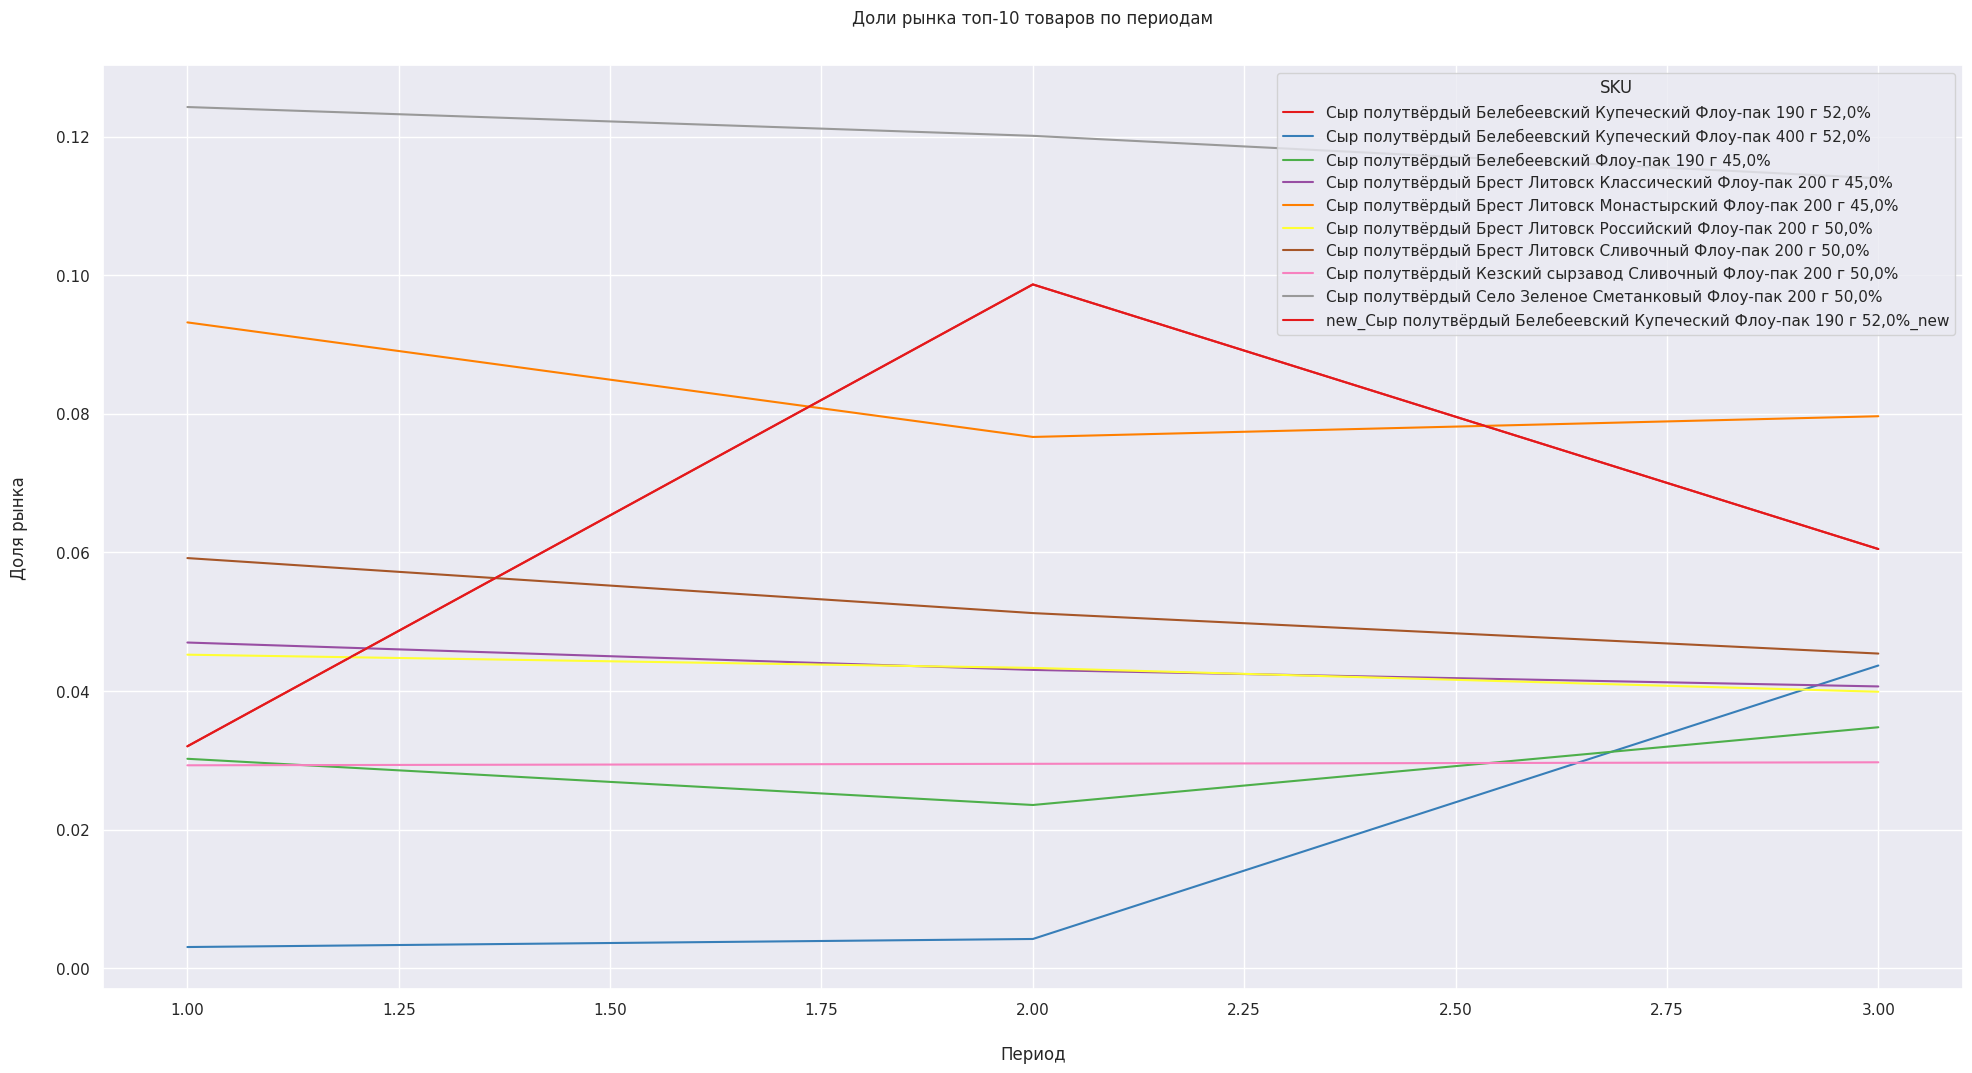

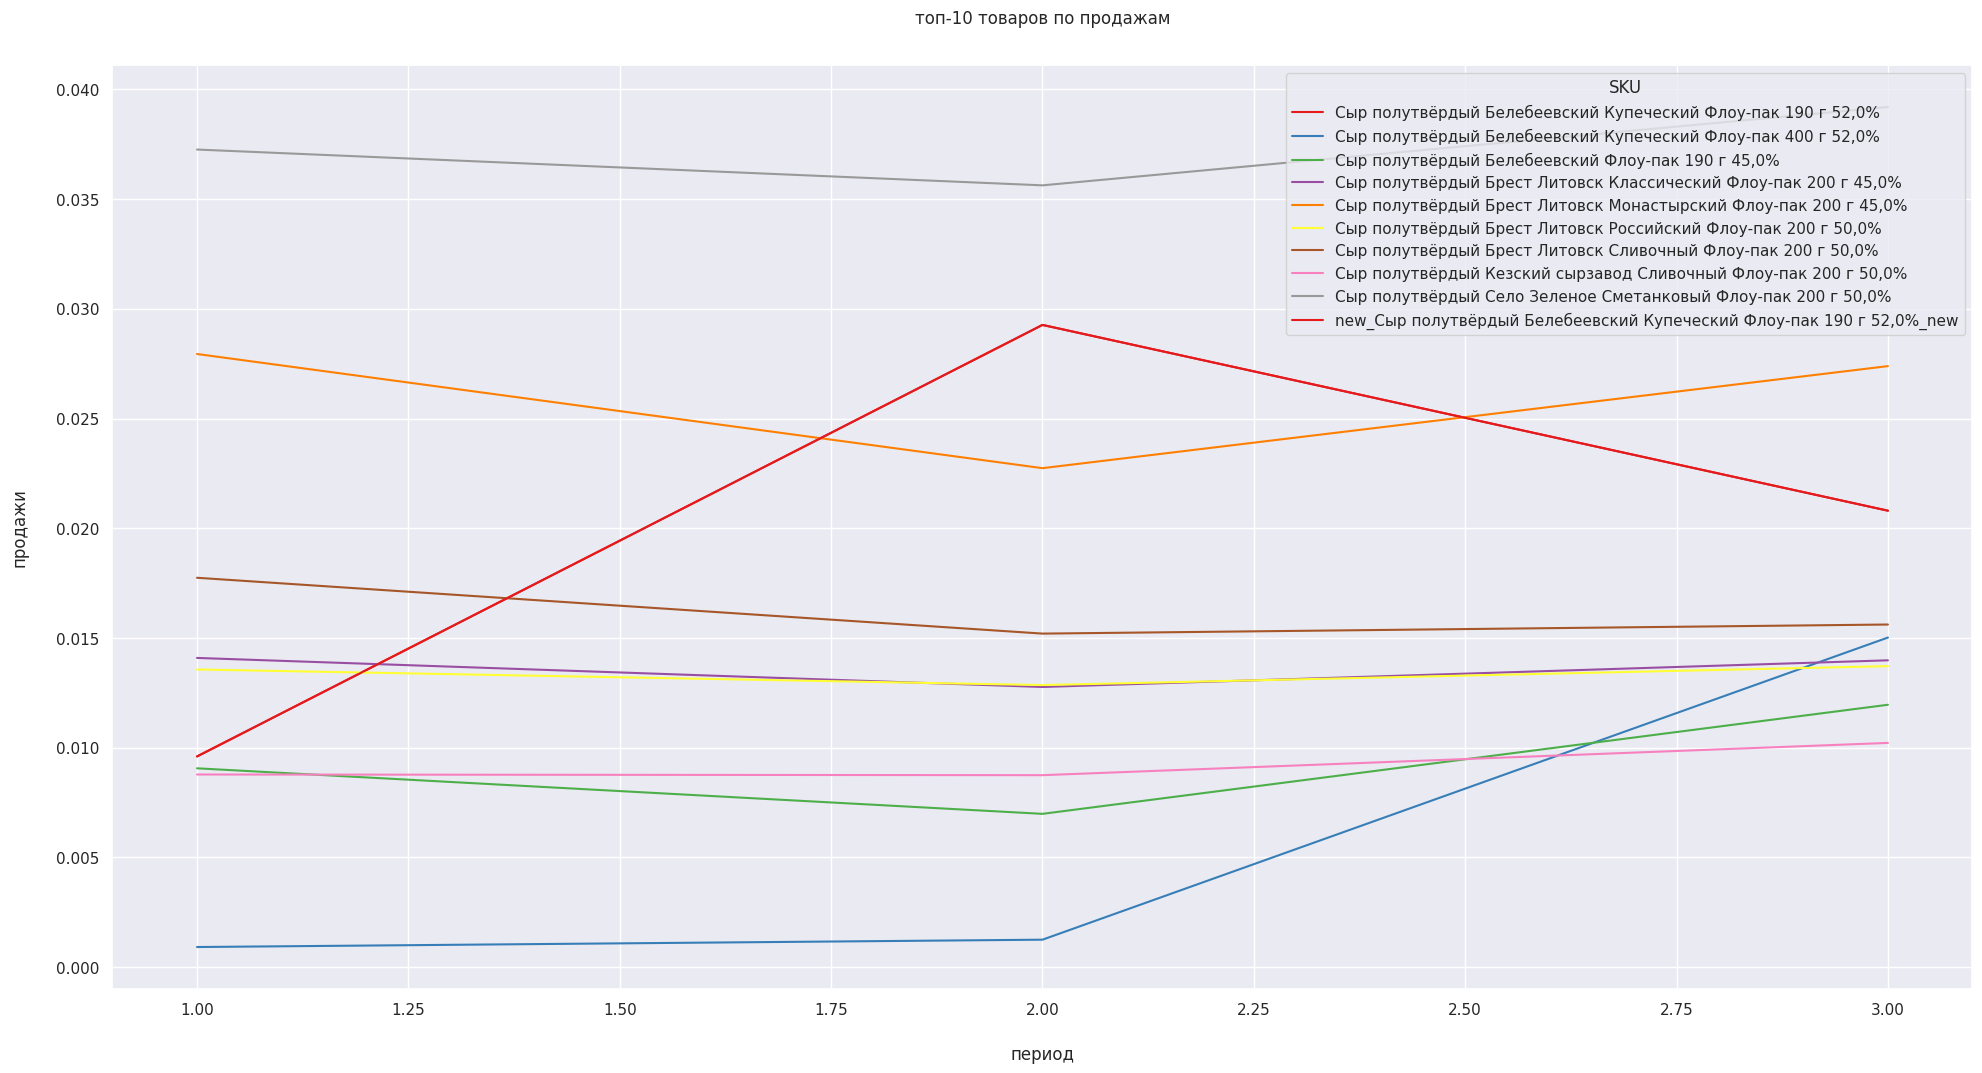

Базовая ску  Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      75.709
Link Function:                     IdentityLink Log Likelihood:                                  -367.3309
Number of Samples:                          252 AIC:                                              888.0798
                                                AICc:                                             956.4824
                                                GCV:                                                2.7362
                                                Scale:                                               1.313
                                                Pseudo R-Squared:    

<ipython-input-12-7a57e987e7f5>:382: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from pygam import LinearGAM, s, f
from sklearn.preprocessing import StandardScaler


if 'data' in locals():
    del data
data= df_train.copy()
data_50= df_test.copy()

if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023


sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)
data_50.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)
#Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
data_50['period'] = data_50['year'].astype(str) + '_' + data_50['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1
data_50['period'] = data_50['period'].astype('category').cat.codes + 1


# Шаг 1: Посчитаем количество периодов для каждого SKU
period_counts = data.groupby('SKU')['period'].nunique().reset_index()
period_counts_50 = data_50.groupby('SKU')['period'].nunique().reset_index()
period_counts.columns = ['SKU', 'period_count']
period_counts_50.columns = ['SKU', 'period_count']

# Шаг 2: Найдем максимальное количество периодов
max_period_count = period_counts['period_count'].max()
# max_period_count_50 = period_counts_50['period_count'].max()

# Шаг 3: Отфильтруем только те SKU, которые продавались в максимальное количество периодов
max_period_skus = period_counts[period_counts['period_count'] == max_period_count]

# Шаг 4: Соединим с исходными данными для получения среднего значения 'er'
grouped = data.groupby('SKU')['er'].mean().reset_index()

# Шаг 5: Оставим только те SKU, которые продавались в максимальное количество периодов
filtered_grouped = grouped[grouped['SKU'].isin(max_period_skus['SKU'])]

# Шаг 6: Найдем SKU с максимальным 'er'
max_sku = filtered_grouped.loc[filtered_grouped['er'].idxmax()]



#Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)
data_50['Package_Weight'] = data_50['Package_Info'].apply(extract_weight)


res_data = data.copy()
res_data_50 = data_50.copy()


# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)
data_50.dropna(inplace=True)
# # Выбираем только топ-10 SKU по максимальной доле рынка
plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['market_share_observed'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='market_share_observed', hue='SKU', palette='Set1')
plt.title('Доли рынка топ-10 товаров по периодам', pad=30)  # Сдвиг заголовка
plt.xlabel('Период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('Доля рынка', labelpad=20)  #
plt.show()



plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['er'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='er', hue='SKU', palette='Set1')
plt.title('топ-10 товаров по продажам', pad=30)  # Сдвиг заголовка
plt.xlabel('период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('продажи', labelpad=20)  #
plt.show()

# base_sku = 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%'
base_sku = max_sku['SKU']
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
print(f'Базовая ску  {base_sku}')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

data_categor = pd.DataFrame()
data_categor_50 = pd.DataFrame()
# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand']:
    data_categor[cat_i]=pd.Categorical(data[cat_i]).codes
    data_categor_50[cat_i]=pd.Categorical(data_50[cat_i]).codes
# data_categor.rename(columns={'SKU':'SKU_cat'},inplace=True)

data_del= data.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)
data_del_50= data_50.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)

data = data_del.join(data_categor).copy()
data_50 = data_del_50.join(data_categor_50).copy()
# # Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})
base_data_50 = data_50[data_50['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand']

base_data_only = data[data['SKU'] == base_sku][['period'] + characteristics].copy()
base_data_only_50 = data_50[data_50['SKU'] == base_sku][['period'] + characteristics].copy()

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')
data_50 = pd.merge(data_50, base_data_50, on='period', how='left')
# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_er'], inplace=True)
data_50.dropna(subset=['base_er'], inplace=True)

data['log_share_ratio'] = np.log(data['er'] / data['base_er'])
data_50['log_share_ratio'] = np.log(data_50['er'] / data_50['base_er'])

ert = data.copy()
ert_50 = data_50.copy()

ert_50.to_excel('f1.xlsx')
data_cat=data.copy()
data_cat_50=data_50.copy()

base_characteristics = base_data_only.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

base_characteristics_50 = base_data_only_50.rename(columns=lambda x: 'base_' + x if x != 'period' else x)
# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data_cat, base_characteristics, on='period', how='left', suffixes=('', '_base'))
data_50 = pd.merge(data_cat_50, base_characteristics_50, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]
    data_50['delta_' + char] = data_50[char] - data_50['base_' + char]

data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['log_share_ratio']
X =  data[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]

y_50 = data_50['log_share_ratio']
X_50 =  data_50[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]


# # # scaler = MinMaxScaler()
scaler = StandardScaler()

# # Applying normalization to the selected columns
normalized_data = pd.DataFrame(scaler.fit_transform(X[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'])
del_data = X.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'],axis=1).reset_index(drop=True)
X=del_data.join(normalized_data)


normalized_data_50 = pd.DataFrame(scaler.transform(X_50[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'])
del_data_50 = X_50.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'],axis=1).reset_index(drop=True)
X_50=del_data_50.join(normalized_data_50)
# # Определим сетку гиперпараметров для поиска
# #_______________________
# from sklearn.model_selection import KFold, cross_val_score

# from pygam import LinearGAM, s, f
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error

# # Определим формулу для модели LinearGAM
# lam_values = np.logspace(-3, 3, 10)  # значения регуляризации
# n_splines_values = [5, 10, 20]  # значения для количества сплайнов для s-функций

# # Настраиваем кросс-валидацию
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Списки для сохранения средних ошибок и гиперпараметров
# mean_rmse = []

# print("Начало кросс-валидации для подбора параметров сглаживания...")

# # Кросс-валидация и подбор гиперпараметров
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         fold_rmse = []

#         # Проходим по всем фолдам кросс-валидации
#         for train_idx, val_idx in cv.split(X):
#             # Разбиваем данные на обучающие и тестовые
#             X_train, X_val = X.values[train_idx], X.values[val_idx]
#             y_train, y_val = y.values[train_idx], y.values[val_idx]

#             # Создаем новую модель для каждой итерации
#             gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#             gam.fit(X_train, y_train)

#             # Прогнозируем на валидационных данных
#             y_pred = gam.predict(X_val)

#             # Считаем RMSE для каждого фолда
#             rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#             fold_rmse.append(rmse)

#         # Сохраняем среднее значение RMSE для текущих гиперпараметров
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'mean_rmse': np.mean(fold_rmse)
#         })

# # Найдем гиперпараметры с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['mean_rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# # #_______________________



# # Задаем сетку значений для гиперпараметров
# lam_values = np.logspace(-3, 3, 30)  # значения регуляризации
# n_splines_values = [5, 10, 20,100]  # значения для количества сплайнов для s-функций

# # Список для сохранения ошибок RMSE и гиперпараметров
# mean_rmse = []

# print("Подбор параметров сглаживания без кросс-валидации...")

# # Перебираем значения параметров n_splines и lam
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         # Создаем и обучаем модель с текущими значениями гиперпараметров
#         gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#         gam.fit(X.values, y.values)

#         # Прогнозируем и вычисляем ошибку RMSE на тех же данных
#         y_pred = gam.predict(X.values)
#         rmse = np.sqrt(mean_squared_error(y.values, y_pred))

#         # Сохраняем значения гиперпараметров и RMSE
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'rmse': rmse
#         })

# # Выбираем комбинацию параметров с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']

# # #_________________
# gam = LinearGAM(s(0)+s(1)+f(2) + f(3) + f(4)+f(5)).fit(X, y)

# # gam = LinearGAM(f(0) + f(1) + f(2)+s(3)+s(4)).fit(X, y)
# gam.gridsearch(X, y)

# # # #__________
# # # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# # Обратное преобразование логарифмического отношения к реальным значениям продаж
# # data['pred_market_share'] = np.exp(data['V']) * data['base_sales_volume']


# # Восстановление предсказанных значений доли продаж SKU
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']
# # #____________________


# optimal_n_splines = 100
# optimal_lam = 0.01
optimal_n_splines = 100
optimal_lam = 0.1
gam = LinearGAM(
    s(0) +
    s(1) +
    f(2) +
    f(3) +
    f(4),
    lam=optimal_lam
)

# # Прогнозируем систематическую утилиту
gam.fit(X.values, y.values)
# gam.gridsearch(X, y)
data['V'] = gam.predict(X)
data.loc[data['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data['pred_market_share'] = np.exp(data['V']) * data['base_er']
data.to_excel('data.xlsx')

gam.summary()


# gam.gridsearch(X, y)
data_50['V'] = gam.predict(X_50)
data_50.loc[data_50['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data_50['pred_market_share_50'] = np.exp(data_50['V']) * data_50['base_er']
data_50.to_excel('data_50.xlsx')


In [13]:
true_pred =data.groupby('SKU')['pred_market_share'].sum()
true_pred



,pred_market_share
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0657965100
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000399067
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0013214962
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0128065263
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0153960902
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0005342040
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0090669247
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0105667594


In [14]:
true_pred.sum()


0.9545529069615079

In [15]:
import pandas as pd
mean_org = pd.DataFrame()
mean_org['org_market_share'] = df_train.groupby('Sku_name')['er'].sum()
mean_org['org_market_share']

,org_market_share
Sku_name,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0596721005
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000283507
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0014736011
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0130188948
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0148774107
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0002621310
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0094352492
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0103718850


In [16]:
mean_org['org_market_share'].sum()

1.0000000000000002

In [17]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.00
WAPE: 0.37
R²: 0.71
R² Adjusted: 0.71


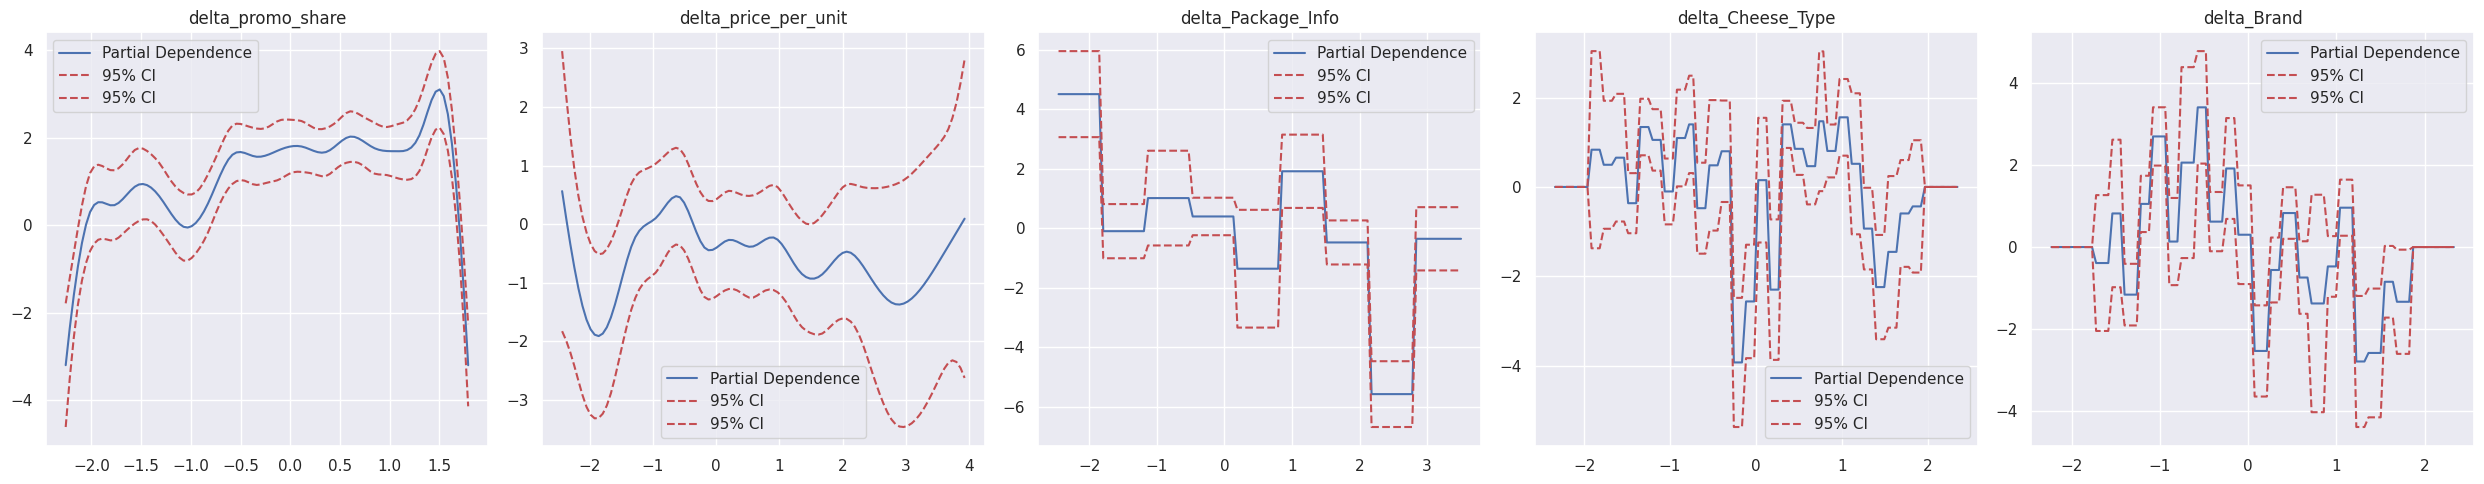

In [18]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

titles = ['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']

# Создание подграфиков с заданным размером фигуры
fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Ширина 25 дюймов и высота 5 дюймов

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    ax.plot(XX[:, i], pd, label='Partial Dependence')
    ax.plot(XX[:, i], ppd[1], c='r', ls='--', label='95% CI')


    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

In [19]:
X.describe()

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand
count,252.0000000000,252.0000000000,252.0000000000,252.0000000000,252.0000000000
mean,-0.0000000000,0.0000000000,-0.0000000000,0.0000000000,0.0000000000
std,1.0019900517,1.0019900517,1.0019900517,1.0019900517,1.0019900517
min,-2.2596412777,-2.4329714594,-1.9538714087,-1.8389562650,-1.7310197633
25%,-0.7418660225,-0.6240628455,-0.0958502955,-1.0576655975,-0.9390978625
50%,0.2007209579,-0.1023245467,-0.0958502955,0.2816898325,-0.0151889783
75%,0.7484027726,0.4718720263,-0.0958502955,0.8397545950,0.8097296684
max,1.7908818453,3.9235016322,3.0008515599,1.8442711675,1.8326287902


In [20]:
true_pred_50 =data_50.groupby('SKU')['pred_market_share_50'].sum()
true_pred_50

,pred_market_share_50
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0462053924
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0014801280
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000001
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0066547030
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0097294091
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0008457082
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0246954161
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0526688523


In [21]:
true_pred_50.sum()

1.1310170470612313

In [22]:
true_pred

,pred_market_share
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0657965100
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000399067
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0013214962
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0128065263
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0153960902
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0005342040
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0090669247
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0105667594


In [23]:
import pandas as pd
# Объединяем expanded_series и true_pred_50 по индексу
combined_series = pd.concat([true_pred, true_pred_50], axis=1)

# Задаем имена колонок для удобства
combined_series.columns = ['True_Pred', 'True_Pred_50']

# Заполняем отсутствующие значения нулями
combined_series = combined_series.fillna(0)

# Вывод результата
combined_series


,True_Pred,True_Pred_50
SKU,,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0657965100,0.0462053924
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000399067,0.0014801280
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0013214962,0.0066547030
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0128065263,0.0097294091
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0153960902,0.0048298836
...,...,...
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 400 г 50,0%",0.0003181258,0.0431100958
"Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200 г 45,0%",0.0001458926,0.0002188910
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000000,0.0000000001


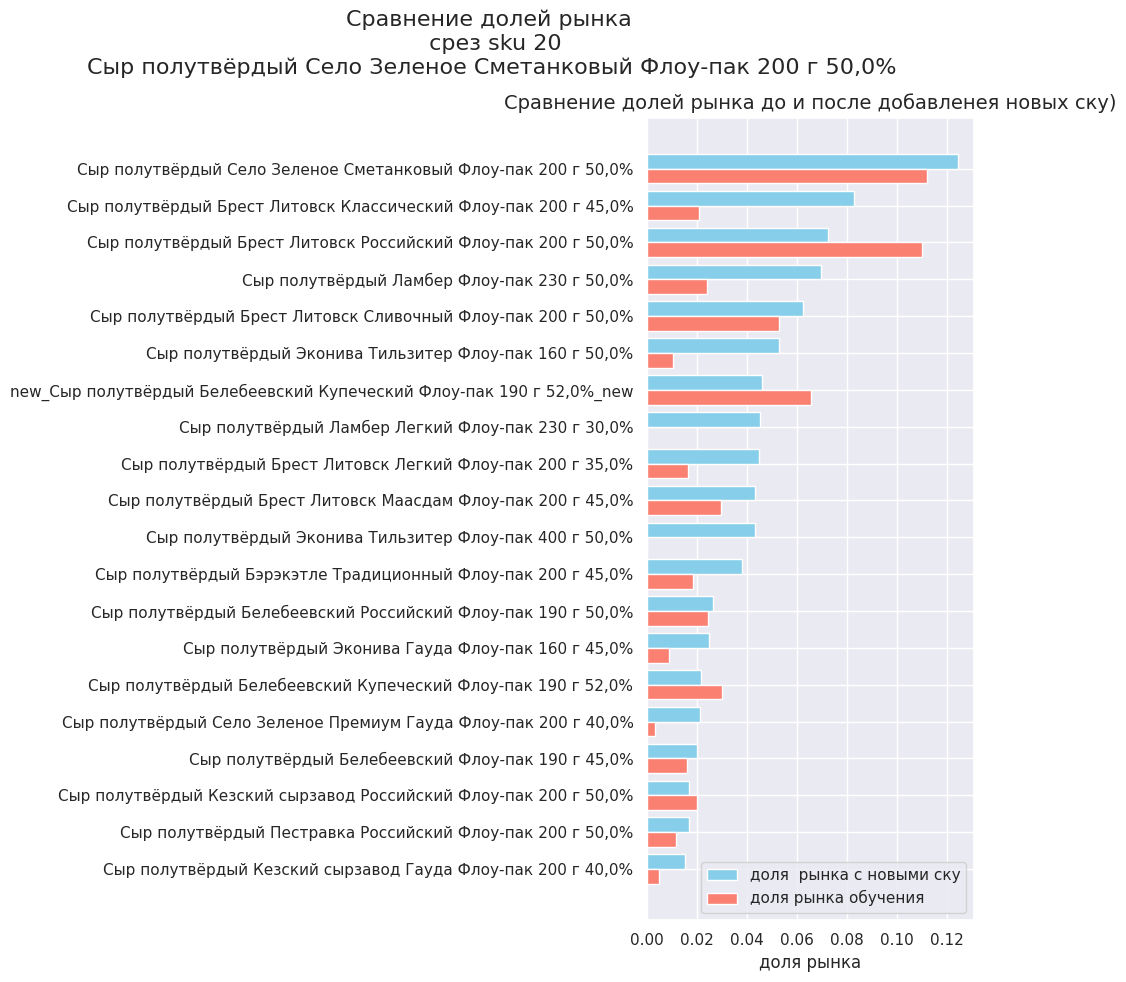

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка с новыми ску')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка обучения')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = combined_series['True_Pred_50'].values
sizes_pred =combined_series['True_Pred'].values
labels_org = combined_series.index.values
top_25=20
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка до и после добавленея новых ску)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [25]:
combined_series['True_Pred_50'].sum()

1.1310170470612313

In [26]:
combined_series['True_Pred'].sum()

0.9545529069615079

In [27]:
vector = [0, 2, 0.2, 0.3]
total_sum = sum(vector)

# Нормализация вектора
normalized_vector = [x / total_sum for x in vector]

# Печать результата
normalized_vector


[0.0, 0.8, 0.08, 0.12]

In [28]:
all_30 =X.join(y).join(data['SKU']).join(data['V']).join(data['pred_market_share'])
all_30.rename(columns={'log_share_ratio': 'y_true_train','V': 'y_pred_train','pred_market_share':'y_pred_train_abs'}, inplace=True)
all_30['y_pred_train_abs_norm']=all_30['y_pred_train_abs']/all_30['y_pred_train_abs'].sum()
all_30

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,y_true_train,SKU,y_pred_train,y_pred_train_abs,y_pred_train_abs_norm
0,-0.7905685101,1.9658997973,0.5234900756,-0.3879878825,-1.7310197633,-7.2316354884,Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 4...,-6.8897437621,0.0000399067,0.0000418067
1,1.1207981262,1.3812637676,-0.0958502955,-0.3879878825,-1.5990327798,-4.2196322957,Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 2...,-4.4890310058,0.0004184588,0.0004383820
2,-1.5670237194,3.6895971496,-0.0958502955,-0.3879878825,-1.5990327798,-4.7685371611,Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 2...,-4.7610020892,0.0003048506,0.0003193648
3,-0.0628636775,2.2685582981,-0.0958502955,-0.3879878825,-1.5990327798,-4.1414159030,Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 2...,-4.1823840386,0.0005981868,0.0006266670
4,0.6320087089,0.3550349328,-0.7151906666,-1.7273433125,-1.4670457963,-2.1902306537,Сыр полутвёрдый Белебеевский Башкирский медовы...,-2.0651096703,0.0047244184,0.0049493521
...,...,...,...,...,...,...,...,...,...,...
247,-1.8014991344,-0.5681577726,-0.0958502955,1.7326582150,1.8326287902,-6.7812222152,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,-6.7351597351,0.0000423371,0.0000443528
248,-1.7622927193,-0.6008561509,-0.0958502955,1.7326582150,1.8326287902,-6.4803250852,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,-6.7046878427,0.0000480191,0.0000503054
249,0.0697170033,-0.0626425008,-0.0958502955,0.5049157375,-1.0710848460,-1.3556588189,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,-0.7876627070,0.0169487051,0.0177556477
250,1.0100987339,-0.9175812415,-0.0958502955,0.5049157375,-1.0710848460,-0.1966323921,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,-0.3214435359,0.0258322866,0.0270621842


In [29]:
all_30['y_pred_train_abs_norm'].sum()

1.0

In [30]:
all_50 = X_50.join(data_50['V']).join(data_50['pred_market_share_50']).join(data_50['SKU'])
all_50.rename(columns={'V': 'y_pred_test_50','pred_market_share_50':'y_pred_test_abs_50'}, inplace=True)
all_50['y_pred_test_abs_norm_50']=all_50['y_pred_test_abs_50']/all_50['y_pred_test_abs_50'].sum()
all_50

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,y_pred_test_50,y_pred_test_abs_50,SKU,y_pred_test_abs_norm_50
0,-0.8006594124,1.9653780541,0.5234900756,-0.2763749300,-1.7310197633,-6.9428353383,0.0000372376,Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 4...,0.0000329240
1,-0.6876251896,1.7006593250,0.5234900756,-0.2763749300,-1.7310197633,-6.6653742801,0.0000550677,Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 4...,0.0000486887
2,-1.3489689815,5.4609684552,0.5234900756,-0.2763749300,-1.7310197633,-3.4257306016,0.0013878226,Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 4...,0.0012270572
3,-2.7540899640,2.1295794668,-0.0958502955,-1.1692785500,-1.5990327798,-19.4976904332,0.0000000001,Сыр полутвёрдый Азбука Сыра Голландский Флоу-п...,0.0000000001
4,2.6878956832,-0.9925030170,-0.0958502955,-1.1692785500,-1.5990327798,-45.3005281328,0.0000000000,Сыр полутвёрдый Азбука Сыра Голландский Флоу-п...,0.0000000000
...,...,...,...,...,...,...,...,...,...
240,-1.6330767079,-0.3353476589,-0.0958502955,1.7326582150,1.8326287902,-6.9901845106,0.0000397955,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,0.0000351856
241,-0.9434079309,-0.4688339105,-0.0958502955,1.7326582150,1.8326287902,-7.2882021179,0.0000291665,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,0.0000257878
242,0.9043739160,0.2540797026,-0.0958502955,0.5049157375,-1.0710848460,-0.7109321388,0.0189436389,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.0167492072
243,0.5858553935,0.3680347330,-0.0958502955,0.5049157375,-1.0710848460,-0.4609065567,0.0272560751,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.0240987306


In [31]:
all_50['y_pred_test_abs_norm_50'].sum()

1.0

In [32]:
import pandas as pd
df_30 = pd.DataFrame()
df_30=all_30.groupby('SKU')['y_pred_train_abs_norm'].sum()
df_50 = pd.DataFrame()
df_50=all_50.groupby('SKU')['y_pred_test_abs_norm_50'].sum()

# Объединяем expanded_series и true_pred_50 по индексу
combined_series_1 = pd.concat([df_30, df_50], axis=1)

# Задаем имена колонок для удобства
combined_series_1.columns = ['True_Pred_1', 'True_Pred_50_1']

# Заполняем отсутствующие значения нулями
combined_series_1 = combined_series_1.fillna(0)

# Вывод результата
cc= combined_series_1.join(combined_series)
cc

,True_Pred_1,True_Pred_50_1,True_Pred,True_Pred_50
SKU,,,,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0689291390,0.0408529584,0.0657965100,0.0462053924
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000418067,0.0013086699,0.0000399067,0.0014801280
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0013844138,0.0058838220,0.0013214962,0.0066547030
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0134162562,0.0086023540,0.0128065263,0.0097294091
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0161291114,0.0042703897,0.0153960902,0.0048298836
...,...,...,...,...
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 400 г 50,0%",0.0003332721,0.0381162211,0.0003181258,0.0431100958
"Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200 г 45,0%",0.0001528387,0.0001935346,0.0001458926,0.0002188910
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000000,0.0000000001,0.0000000000,0.0000000001


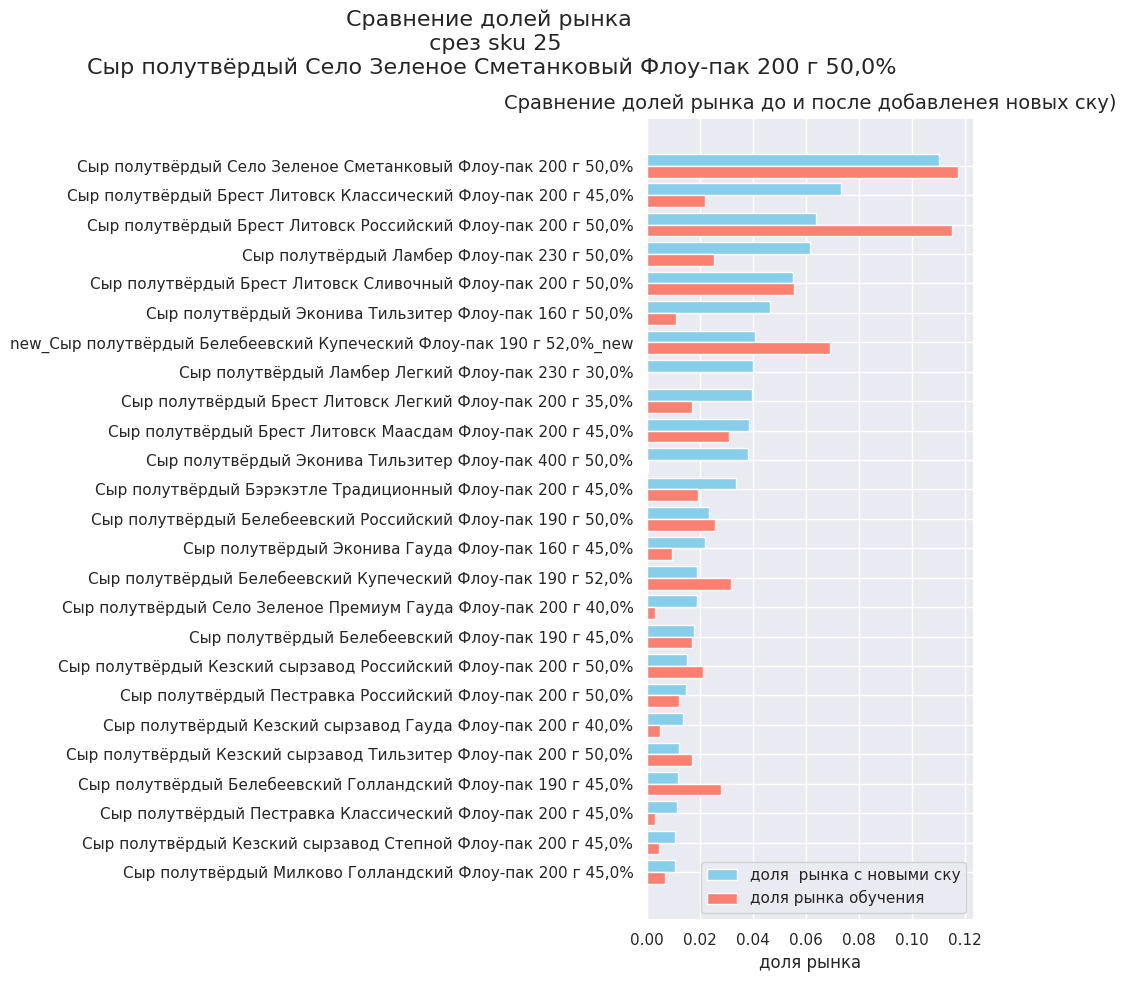

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка с новыми ску')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка обучения')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = combined_series_1['True_Pred_50_1'].values
sizes_pred =combined_series_1['True_Pred_1'].values
labels_org = combined_series_1.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка до и после добавленея новых ску)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [34]:
cc['True_Pred_50_1'].sum()

1.0

In [35]:
cc['True_Pred_50'].sum()

1.1310170470612313

In [36]:
cc['True_Pred_1'].sum()


1.0

In [37]:
cc['True_Pred'].sum()

0.9545529069615079

In [38]:
import pandas as pd
df_test_org = pd.DataFrame()
df_test_org['org_market_share_test'] = df_test.groupby('Sku_name')['er'].sum()
df_test_org['org_market_share_test']

data_50['pred_market_share_50']

,pred_market_share_50
0,0.0000372376
1,0.0000550677
2,0.0013878226
3,0.0000000001
4,0.0000000000
...,...
240,0.0000397955
241,0.0000291665
242,0.0189436389
243,0.0272560751


In [39]:
import pandas as pd
df_test_pred = pd.DataFrame()
df_test_pred['pred_market_share_test'] = data_50.groupby('SKU')['pred_market_share_50'].sum()
df_test_pred['pred_market_share_test']



,pred_market_share_test
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0462053924
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0014801280
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000001
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0066547030
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0097294091
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0008457082
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0246954161
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0526688523


In [40]:
df_test_pred['pred_market_share_test'].sum()

1.1310170470612313

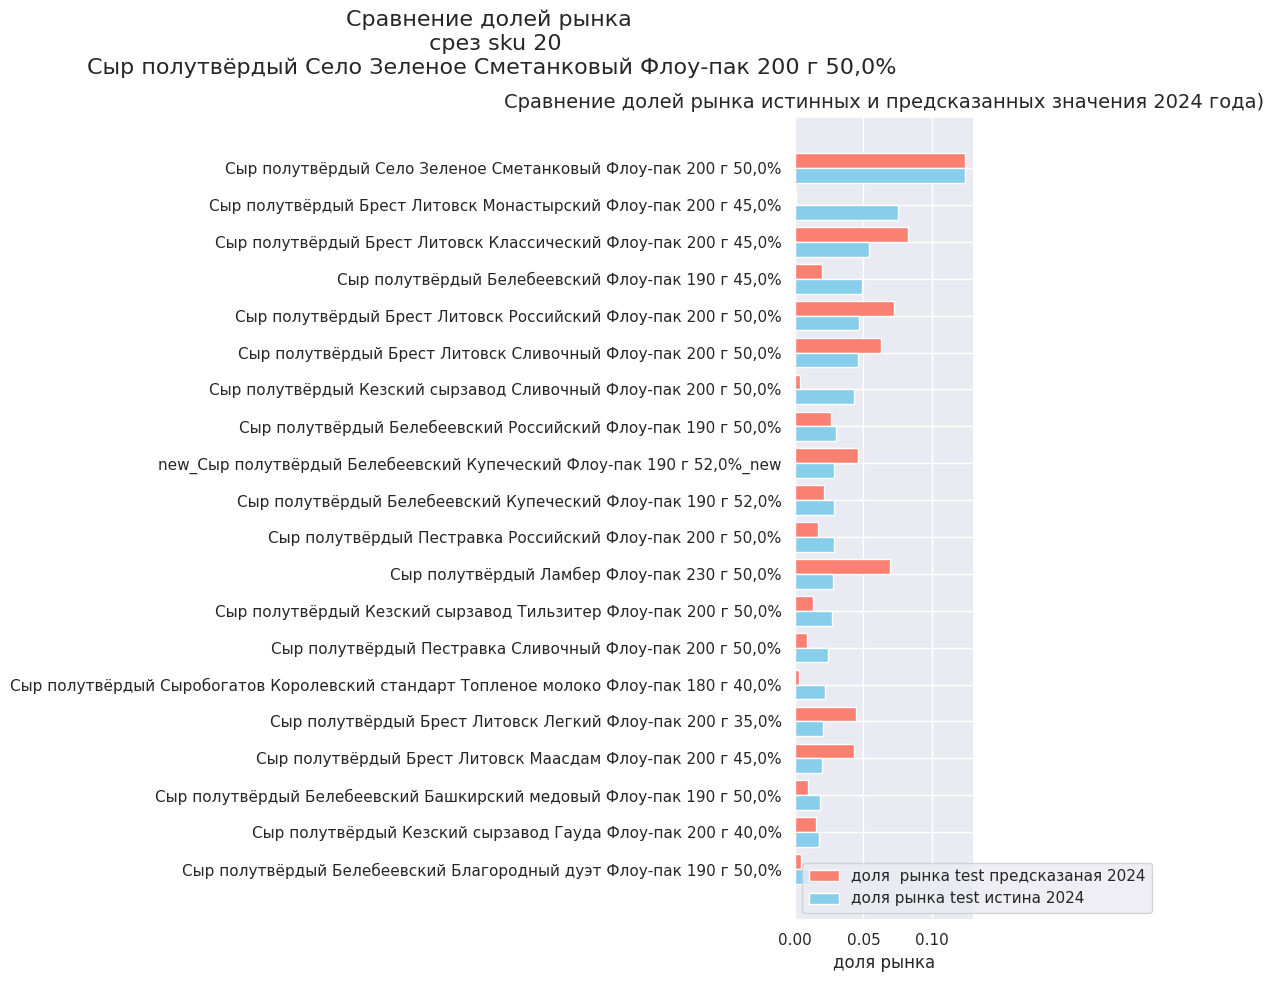

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля  рынка test предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля рынка test истина 2024')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = df_test_org['org_market_share_test'].values
sizes_pred =df_test_pred['pred_market_share_test'].values
labels_org = df_test_org.index.values
top_25=20
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка истинных и предсказанных значения 2024 года)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


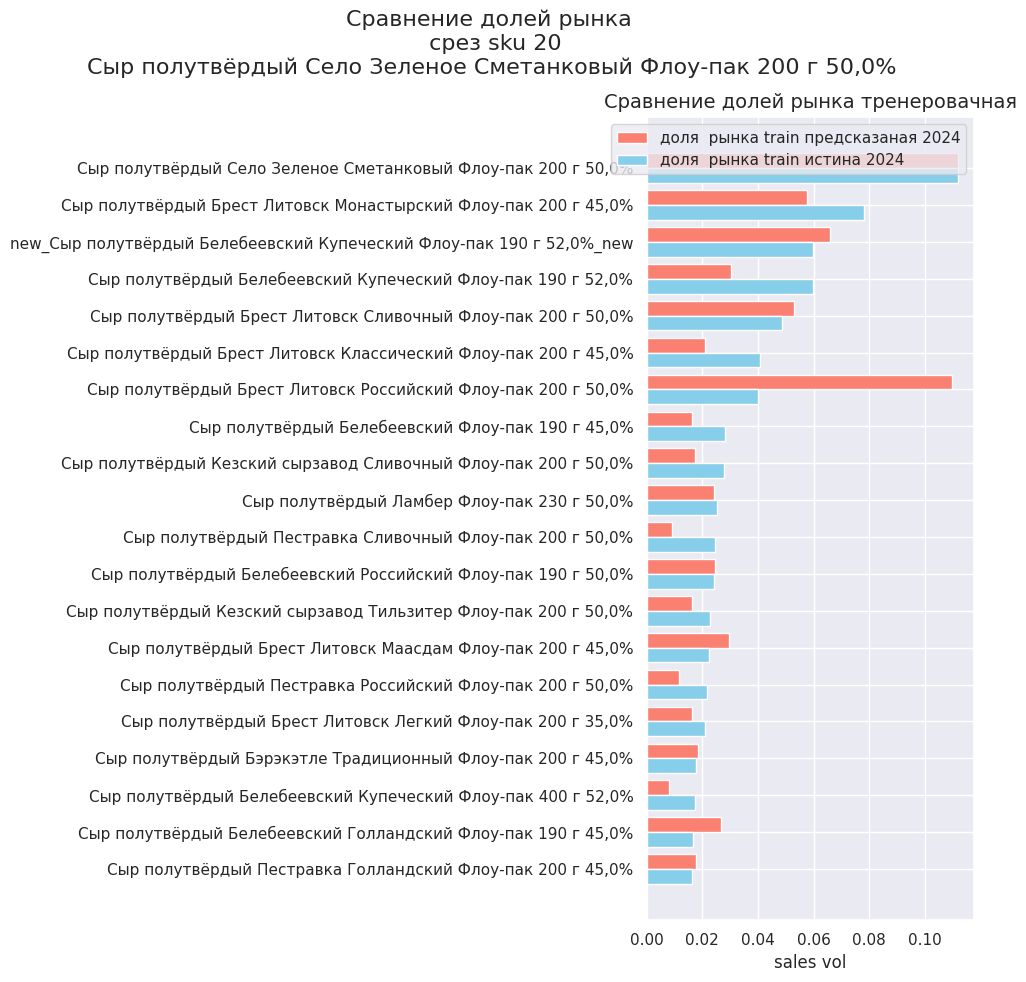

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля  рынка train предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка train истина 2024')

    # Установка меток на оси Ycolor='skyblue'
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('sales vol')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values
top_25=20
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка тренеровачная', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [43]:
df_test_pred['pred_market_share_test']

,pred_market_share_test
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0462053924
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0014801280
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000001
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0066547030
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0097294091
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0008457082
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0246954161
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0526688523


In [44]:
df_test_pred['pred_market_share_test'].sum()

1.1310170470612313

In [46]:
df_test_org['org_market_share_test'].sum()

1.0000000000000002

In [45]:
df_test_org['org_market_share_test']

,org_market_share_test
Sku_name,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0284243896
"Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%",0.0000130350
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0011739717
"Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%",0.0012340392
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0180299251
...,...
"Сыр полутвёрдый Эконива Schollbrunn Флоу-пак 200 г 50,0%",0.0008690033
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",0.0137335211
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",0.0045610959


In [47]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(df_test_org['org_market_share_test'].values,df_test_pred['pred_market_share_test'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(df_test_org['org_market_share_test'].values,df_test_pred['pred_market_share_test'])
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(df_test_org['org_market_share_test'].values - df_test_pred['pred_market_share_test']) / sum(df_test_org['org_market_share_test'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.01
WAPE: 0.72
R²: 0.32
R² Adjusted: 0.31


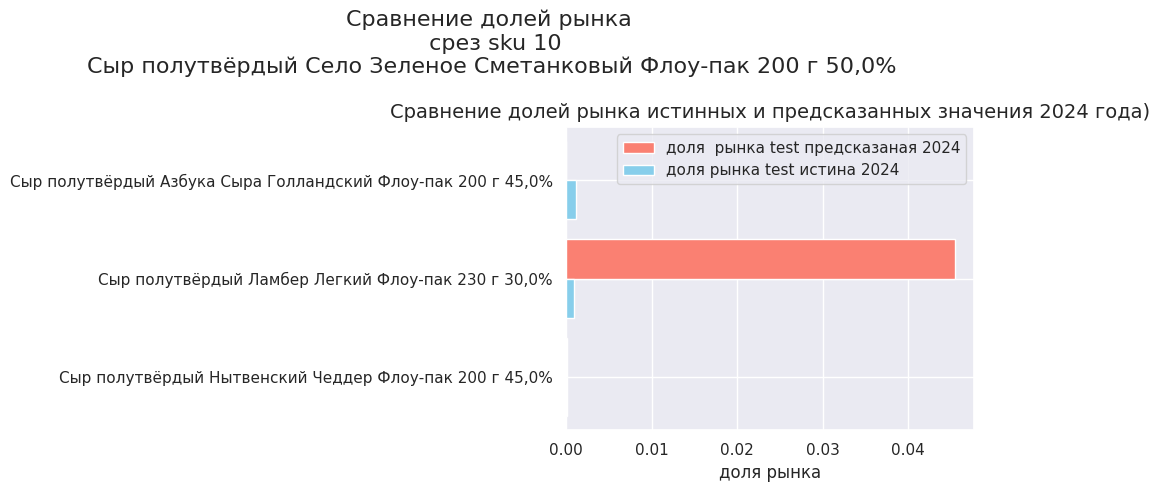

['Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%',
 'Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%']

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля  рынка test предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля рынка test истина 2024')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax


new_sku_org= df_test_org[df_test_org.index.isin(['Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%',
       'Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%',
       'Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%'])]

new_sku_pred= df_test_pred[df_test_pred.index.isin(['Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%',
       'Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%',
       'Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%'])]

# Извлечение данных для построения диаграмм
sizes_org = new_sku_org['org_market_share_test'].values
sizes_pred =new_sku_pred['pred_market_share_test'].values
labels_org = new_sku_org.index.values
top_25=10
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 5))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка истинных и предсказанных значения 2024 года)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()
['Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%',
       'Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%',
       'Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%']

In [70]:
new_sku_org

,org_market_share_test
Sku_name,
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0011739717
"Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%",0.0008765492
"Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%",0.0001164573


In [71]:
new_sku_pred

,pred_market_share_test
SKU,
"Сыр полутвёрдый Азбука Сыра Голландский Флоу-пак 200 г 45,0%",0.0000000001
"Сыр полутвёрдый Ламбер Легкий Флоу-пак 230 г 30,0%",0.0454071345
"Сыр полутвёрдый Нытвенский Чеддер Флоу-пак 200 г 45,0%",0.0000690922
